In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
lr = 0.1
inputs = 784
num_hidden = 100
outputs = 10

def sigmoid(x):
    return (1 + np.exp(-x))**-1

# One should do this numerically though and not use a function
# store num_activations
# gradients <- num_activations*(1-num_activations)
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def loss(y, y_hat):
    return np.sum(np.square(y-y_hat))

w_ji = np.random.randn(num_hidden, inputs)
w_kj = np.random.randn(outputs, num_hidden)

def feed_forward(x_i):
    b_j = np.matmul(w_ji, x_i)
    V_j = sigmoid(b_j)
    b_k = np.matmul(w_kj, V_j)
    O_k = sigmoid(b_k)
    return O_k

# Create random input and output
y_k = np.random.randn(outputs, 1)
x_i = np.random.randn(inputs, 1)
                     
w_ji = np.random.randn(num_hidden, inputs)
w_kj = np.random.randn(outputs, num_hidden)
b_j = np.matmul(w_ji, x_i)
V_j = sigmoid(b_j)
b_k = np.matmul(w_kj, V_j)
O_k = sigmoid(b_k)

print(x_i.shape)
print(V_j.shape)
print(O_k.shape)

(784, 1)
(100, 1)
(10, 1)


In [91]:
'''
Shape of neural network is
784 -> 100 -> 10

w_ji.shape = [784, 100]
w_kj.shape = [100, 10]

'''

# Errors for the output layer
delta_k = (y_k-O_k)*sigmoid_prime(b_k)
print("delta_k: ", delta_k.shape)

# The propagated error for the second weight matrix
delta_w_kj = np.matmul(delta_k, V_j.transpose())
print("update term: ", delta_w_kj.shape)

# The propagated error for the first weightmatrix
#delta_w_ji = np.matmul(delta_k, w_kj)
#DELTA_k = np.matmul(np.matmul(delta_k.transpose(), w_kj), sigmoid_prime(b_j))
print("w_kj: ", w_kj.shape)
DELTA_k = np.multiply(np.dot(delta_k.transpose(), w_kj), sigmoid_prime(b_j).transpose())
print("s_prime: ", sigmoid_prime(b_j).shape)
print("DELTA_k: ", DELTA_k.shape)
print("x_i: ", x_i.shape)
print("w_ji: ", w_ji.shape)
delta_w_ji = np.matmul(x_i, DELTA_k).shape

'''
def backpropagation(y_k, O_k):
    delta_k = (y_k-O_k)*sigmoid_prime(b_k)
    delta_w_kj = np.matmul(delta_k, V_j.transpose()).transpose()

def update_weights(w, delta_w, eta):
    return w - eta*delta_w
'''

w_kj2 = w_kj + lr*delta_w_kj
#w_ji2 = w_ji + lr*np.matmul(delta_k)
#print(V_j.shape)
#print(w_kj.shape)
#print(w_kj2.shape)

delta_k:  (10, 1)
update term:  (10, 100)
w_kj:  (10, 100)
s_prime:  (100, 1)
DELTA_k:  (1, 100)
x_i:  (784, 1)
w_ji:  (100, 784)


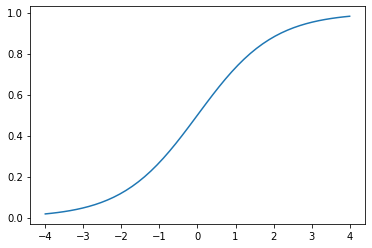

In [4]:
x2 = np.linspace(-4, 4)
plt.plot(x2, sigmoid(x2))

(60000, 784)
(60000,)
(60000, 10)


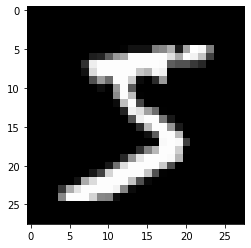

In [5]:
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='mnist_data/train-images.idx3-ubyte', 
        labels_path='mnist_data/train-labels.idx1-ubyte')

print(X.shape)
print(y.shape)

nb_classes = 10
targets = y.reshape(-1)
one_hot_targets = np.eye(nb_classes)[targets]

print(one_hot_targets.shape)

plt.imshow(X[0, :].reshape(28, 28), cmap='gray')

In [6]:
y_hat = feed_forward(X[0, :])

print(loss(one_hot_targets[0, :], y_hat))

4.9932556563603185
